<a href="https://colab.research.google.com/github/mayukhsarkar20/Cricket-score-display/blob/main/IPL_score_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


/tmp/ipython-input-3216305452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_count.values,y=matches_count.index,palette = "rainbow")


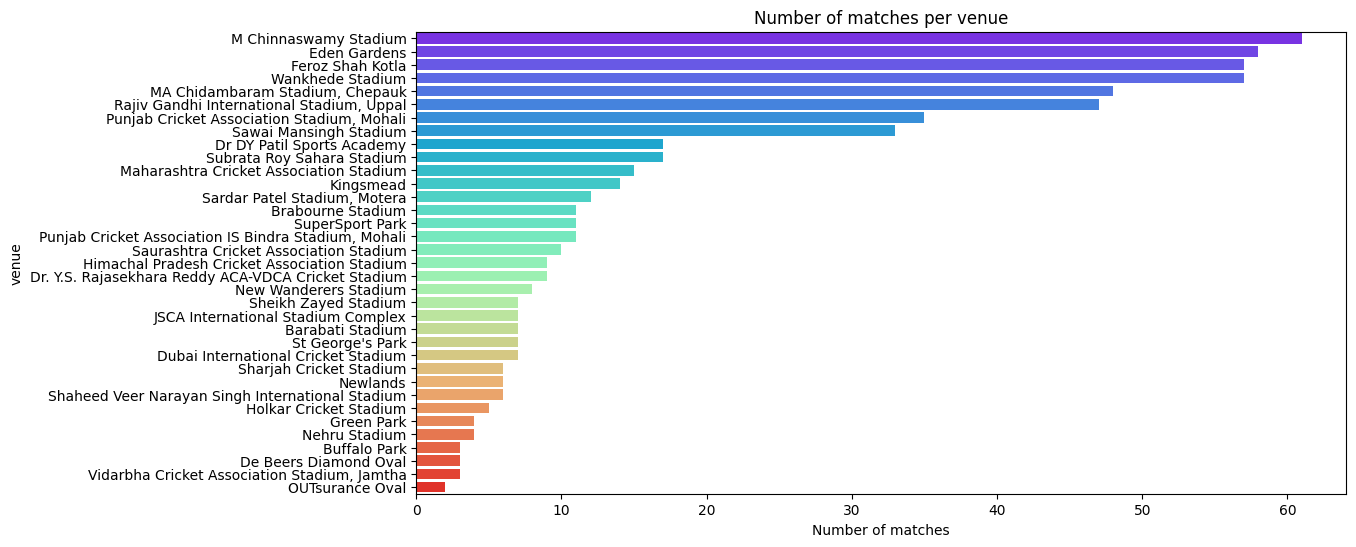

In [ ]:
data = ipl.copy()
matches_per_venue = data[['mid','venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=matches_count.values,y=matches_count.index,palette = "rainbow")
plt.title('Number of matches per venue')
plt.xlabel('Number of matches')
plt.ylabel('venue')
plt.show()

/tmp/ipython-input-2459424392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_by_batsman.values,y=runs_by_batsman.index,palette = "pastel")


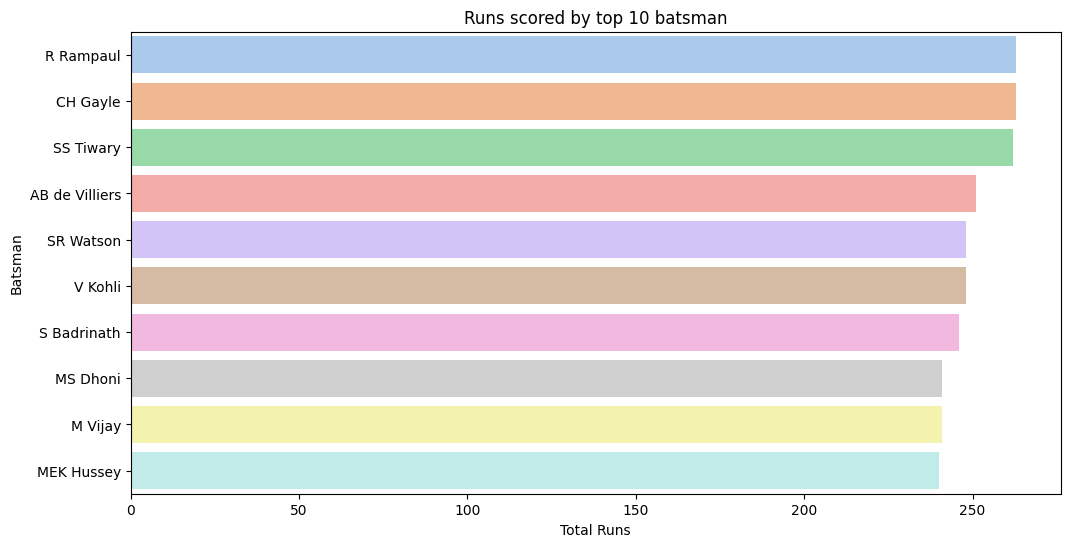

In [ ]:
runs_by_batsman = data.groupby('batsman')['runs'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=runs_by_batsman.values,y=runs_by_batsman.index,palette = "pastel")
plt.title('Runs scored by top 10 batsman')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

/tmp/ipython-input-2683242545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_by_Bowler.values,y=wickets_by_Bowler.index,palette = "muted")


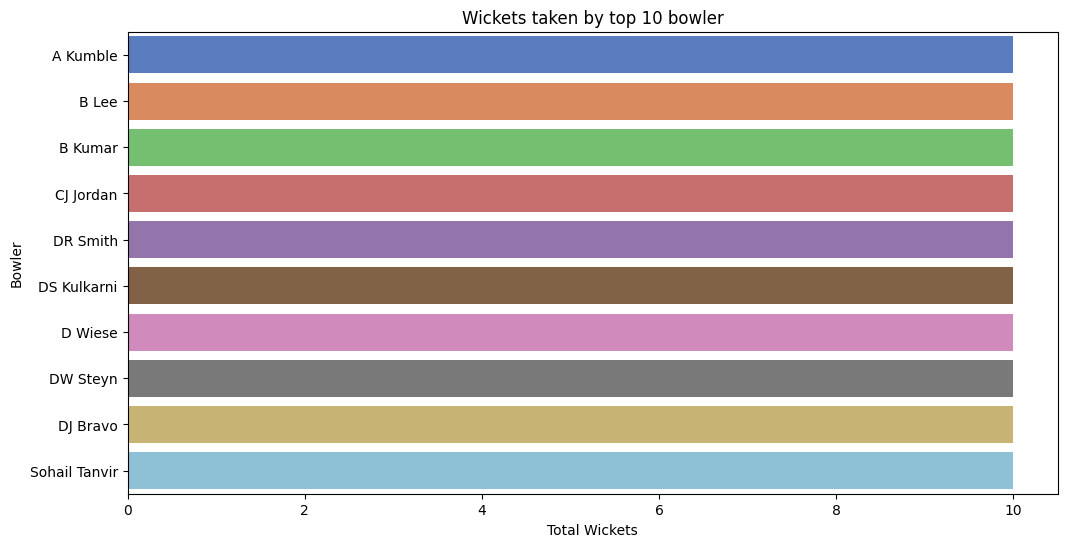

In [ ]:
wickets_by_Bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_Bowler.values,y=wickets_by_Bowler.index,palette = "muted")
plt.title('Wickets taken by top 10 bowler')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['bat_team', 'bowl_team', 'venue', 'batsman', 'bowler']
data_encoded = data.copy()
label_encoders = {}
for col in cat_cols:
  le = LabelEncoder()
  data_encoded[col] = le.fit_transform(data_encoded[col])
  label_encoders[col] = le

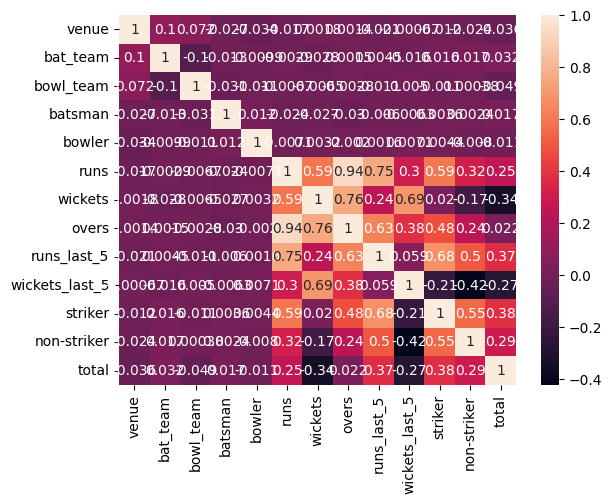

In [ ]:
data_corr = data_encoded.drop(columns = ["date", "mid"],axis = 0.5)
sns.heatmap(data_corr.corr(),annot=True)
plt.show()

In [ ]:
feature_cols = ['bat_team', 'bowl_team', 'venue', 'batsman', 'bowler', 'runs', 'wickets', 'overs', 'striker']
X = data_encoded[feature_cols]
y = data_encoded['total']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    keras.layers.Input( shape=
                       (X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
huber_loss = tf.keras.losses.Huber(delta=0.5)
#i can adjust the "delta" parameter as needed
model.compile(optimizer='adam', loss=huber_loss)

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 64, validation_data=(X_test_scaled, y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 51.6044 - val_loss: 14.9776
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 15.0553 - val_loss: 14.3397
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.8207 - val_loss: 14.2948
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 14.7551 - val_loss: 14.2681
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 14.6472 - val_loss: 14.2627
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 14.5663 - val_loss: 14.2373
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 14.5155 - val_loss: 14.2109
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.5351 - val_loss: 14.5732
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 14.6498 - val_loss: 14.1200
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 14.6435 - val_loss: 14.1494


<Axes: >

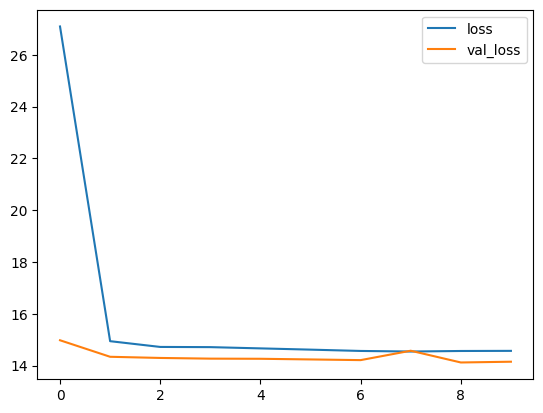

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
predictions = model.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


14.640290260314941

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=list(label_encoders['venue'].classes_), description='Select Venue:')
venue.style = {'description_width': 'initial'}

batting_team = widgets.Dropdown(options=list(label_encoders['bat_team'].classes_), description='Select Batting Team:')
batting_team.style = {'description_width': 'initial'}

bowling_team = widgets.Dropdown(options=list(label_encoders['bowl_team'].classes_), description='Select Bowling Team:')
bowling_team.style = {'description_width': 'initial'}

striker = widgets.Dropdown(options=list(label_encoders['batsman'].classes_), description='Select Striker:')
striker.style = {'description_width': 'initial'}

bowler = widgets.Dropdown(options=list(label_encoders['bowler'].classes_), description='Select Bowler:')
bowler.style = {'description_width': 'initial'}

runs = widgets.IntText(value=0, description='Runs:', style={'description_width': 'initial'})
wickets = widgets.IntText(value=0, description='Wickets:', style={'description_width': 'initial'})
overs = widgets.FloatText(value=0.0, description='Overs:', style={'description_width': 'initial'})
striker_ind = widgets.IntText(value=0, description='Striker:', style={'description_width': 'initial'})
predict_button = widgets.Button(description="Predict Score")

output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()

        encoded_venue = label_encoders['venue'].transform([venue.value])[0]
        encoded_batting_team = label_encoders['bat_team'].transform([batting_team.value])[0]
        encoded_bowling_team = label_encoders['bowl_team'].transform([bowling_team.value])[0]
        encoded_striker = label_encoders['batsman'].transform([striker.value])[0]
        encoded_bowler = label_encoders['bowler'].transform([bowler.value])[0]

        input_features = [
            encoded_batting_team,
            encoded_bowling_team,
            encoded_venue,
            runs.value,
            wickets.value,
            overs.value,
            striker_ind.value,
            encoded_striker,
            encoded_bowler
        ]

        input_array = np.array(input_features).reshape(1, -1)
        input_array = scaler.transform(input_array)
        predicted_score = model.predict(input_array)


        print(f"Predicted Total Runs: {int(predicted_score[0])}")

predict_button.on_click(predict_score)

display(venue, batting_team, bowling_team, striker, bowler,
        runs, wickets, overs,
        striker_ind,
        predict_button, output)

Dropdown(description='Select Venue:', options=('Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De Be…

Dropdown(description='Select Batting Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='Select Bowling Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='Select Striker:', options=('A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary', 'A…

Dropdown(description='Select Bowler:', options=('A Ashish Reddy', 'A Chandila', 'A Choudhary', 'A Flintoff', '…

IntText(value=0, description='Runs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Wickets:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Overs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Striker:', style=DescriptionStyle(description_width='initial'))

Button(description='Predict Score', style=ButtonStyle())

Output()